In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Thuc_Hanh/Phan_Khuc_Khach_Hang

/content/gdrive/MyDrive/Thuc_Hanh/Phan_Khuc_Khach_Hang


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Thuc_Hanh/Phan_Khuc_Khach_Hang/data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df[df['UnitPrice'] == 0].count()

,0
InvoiceNo,40
StockCode,40
Description,40
Quantity,40
InvoiceDate,40
UnitPrice,40
CustomerID,40
Country,40


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Tính RFM

In [ ]:
current_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)
df['Money_spend'] = df['Quantity'] * df['UnitPrice']
df = df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda x: (current_date - x.max()).days,
        'InvoiceNo': 'count',
        'Money_spend': 'sum'
    }
)

In [ ]:
df.head()

,InvoiceDate,InvoiceNo,Money_spend
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Money_spend': 'Monetary'
}, inplace = True)

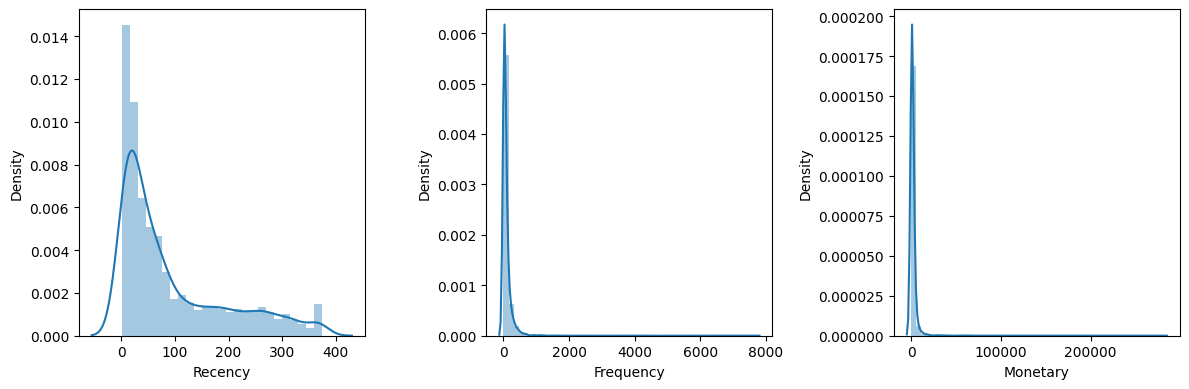

In [ ]:
png , ax = plt.subplots(1,3, figsize = (12,4))
sns.distplot(df['Recency'], ax = ax[0])
sns.distplot(df['Frequency'], ax = ax[1])
sns.distplot(df['Monetary'], ax = ax[2])
plt.tight_layout()
plt.show()

In [ ]:
# Cả 3 biểu đồ đều lệch phải
# Recency thấp cho thấy nhiều khách hàng mua gần đây , nhiều người quay lại mua sắm
# Recency cao cho thấy khách hàng đã không quay lại mua hàng trong một khoảng thời gian dài
# Frequencythấp  cho thấy 1 số khách hàng chỉ mua 1 2 lần và không quay lại , cao cho thấy khách hàng này là khách hàng trung thành
# Monetary thấp cho thấy các khách hàng chi tiết rất ít chủ yêu mua linh tinh
# tuy nhiên Monetary cao cho thấy có 1 số lượng khách hàng chi tiêu mạnh làm tăng doanh thu cửa hàng (ưu tiên)

In [ ]:
import scipy.stats as stats

In [ ]:
def analyze_skewness(x):
  fig , ax = plt.subplots(2 ,2 , figsize = (12,8))
  sns.distplot(df[x] , ax = ax[0][0])
  sns.distplot(np.log(df[x]) , ax = ax[0][1])
  sns.distplot(np.sqrt(df[x]) , ax = ax[1][0])
  transform_data , _ = stats.boxcox(df[x])
  sns.distplot(transform_data , ax = ax[1][1])
  plt.tight_layout()
  plt.show()
  print(f'skewness of {x} is {df[x].skew()}')
  print(f'skewness of log {x} is {np.log(df[x]).skew()}')
  print(f'skewness of sqrt {x} is {np.sqrt(df[x]).skew()}')
  print(f'skewness of boxcox {x} is {pd.Series(stats.boxcox(df[x])[0]).skew()}')

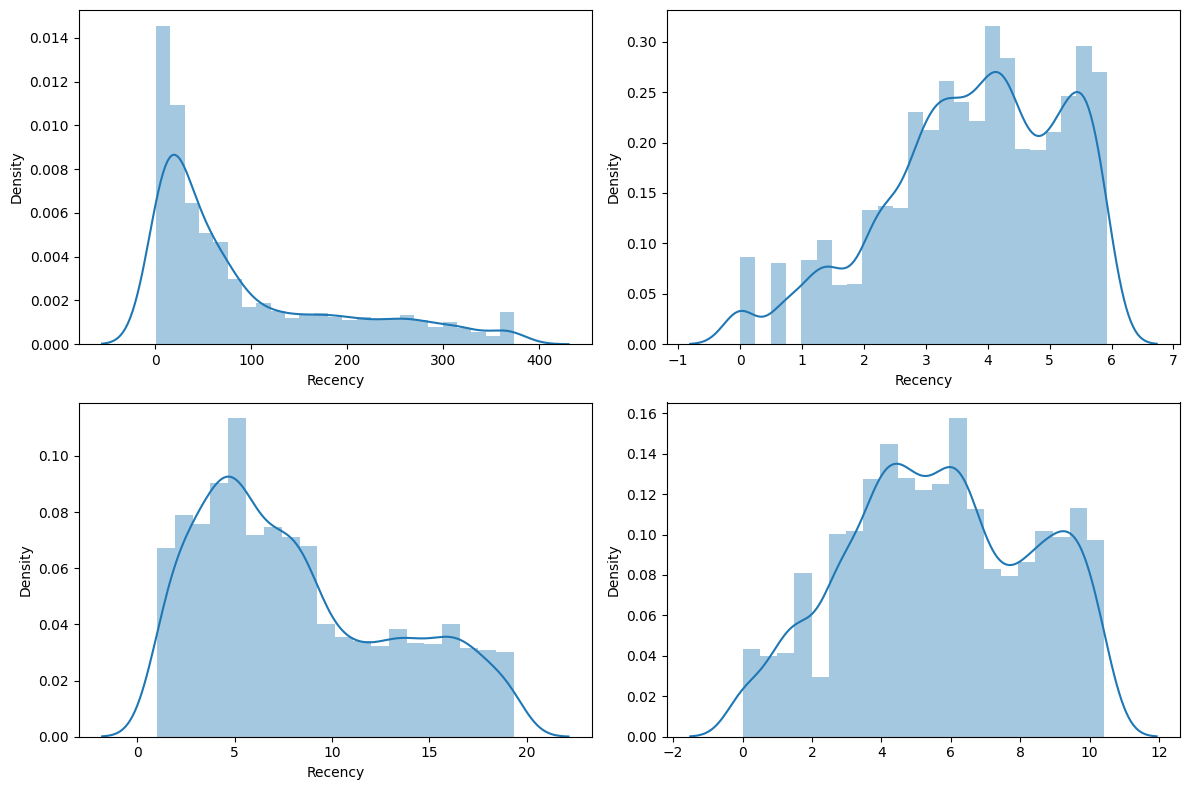

skewness of Recency is 1.2460475158158468
skewness of log Recency is -0.5545663465045348
skewness of sqrt Recency is 0.5887004107087928
skewness of boxcox Recency is -0.07040207530051613


In [ ]:
analyze_skewness('Recency')

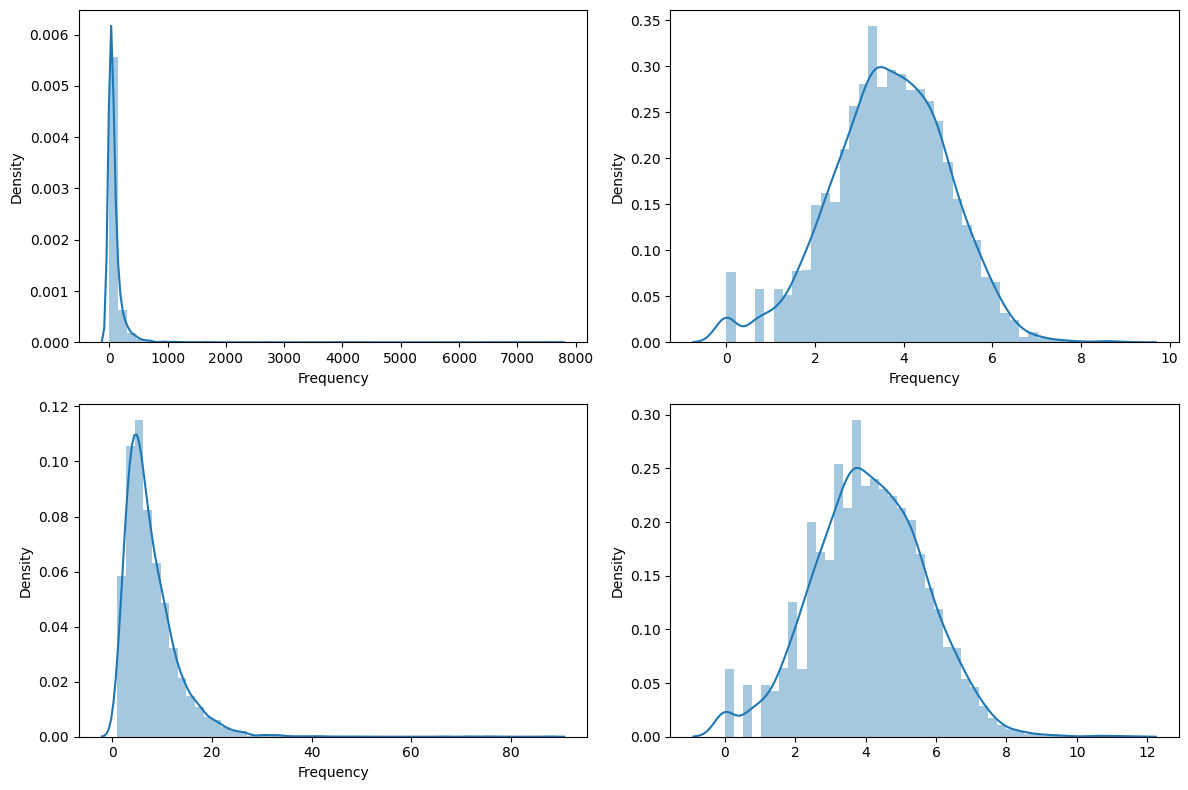

skewness of Frequency is 18.043529536033585
skewness of log Frequency is -0.21796849586544115
skewness of sqrt Frequency is 3.2331451739373933
skewness of boxcox Frequency is 0.00446499901005035


In [ ]:
analyze_skewness('Frequency')

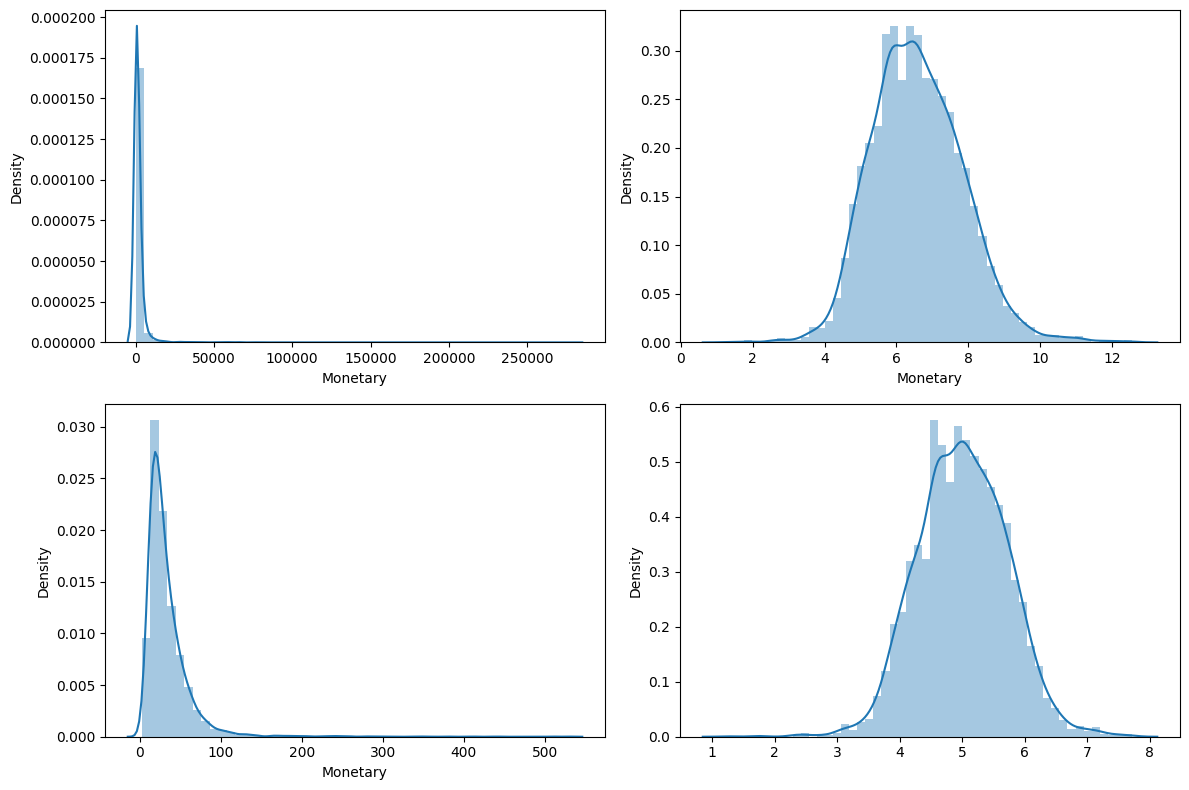

skewness of Monetary is 19.339367981525182
skewness of log Monetary is 0.38400619468241354
skewness of sqrt Monetary is 5.894597894865217
skewness of boxcox Monetary is -0.015717837768663777


In [ ]:
analyze_skewness('Monetary')

In [ ]:
df_final = df.copy()

In [ ]:
df['Frequency'] = stats.boxcox(df['Frequency'])[0]
df['Monetary'] = stats.boxcox(df['Monetary'])[0]
df['Recency'] = stats.boxcox(df['Recency'])[0]

In [ ]:
df.head(2)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,10.039089,0.000000,7.252372
12347.0,0.737107,5.964958,5.993348


### xử dụng stardscaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled

array([[ 1.62487001, -2.57707934,  3.1404393 ],
       [-1.84163571,  1.17777745,  1.3784993 ],
       [ 0.29121018, -0.21330576,  0.75347983],
       ...,
       [-1.18095643, -0.90877362, -1.14006859],
       [-1.5313799 ,  2.35049222,  0.84889431],
       [-0.1303989 ,  0.41115767,  0.76980031]])

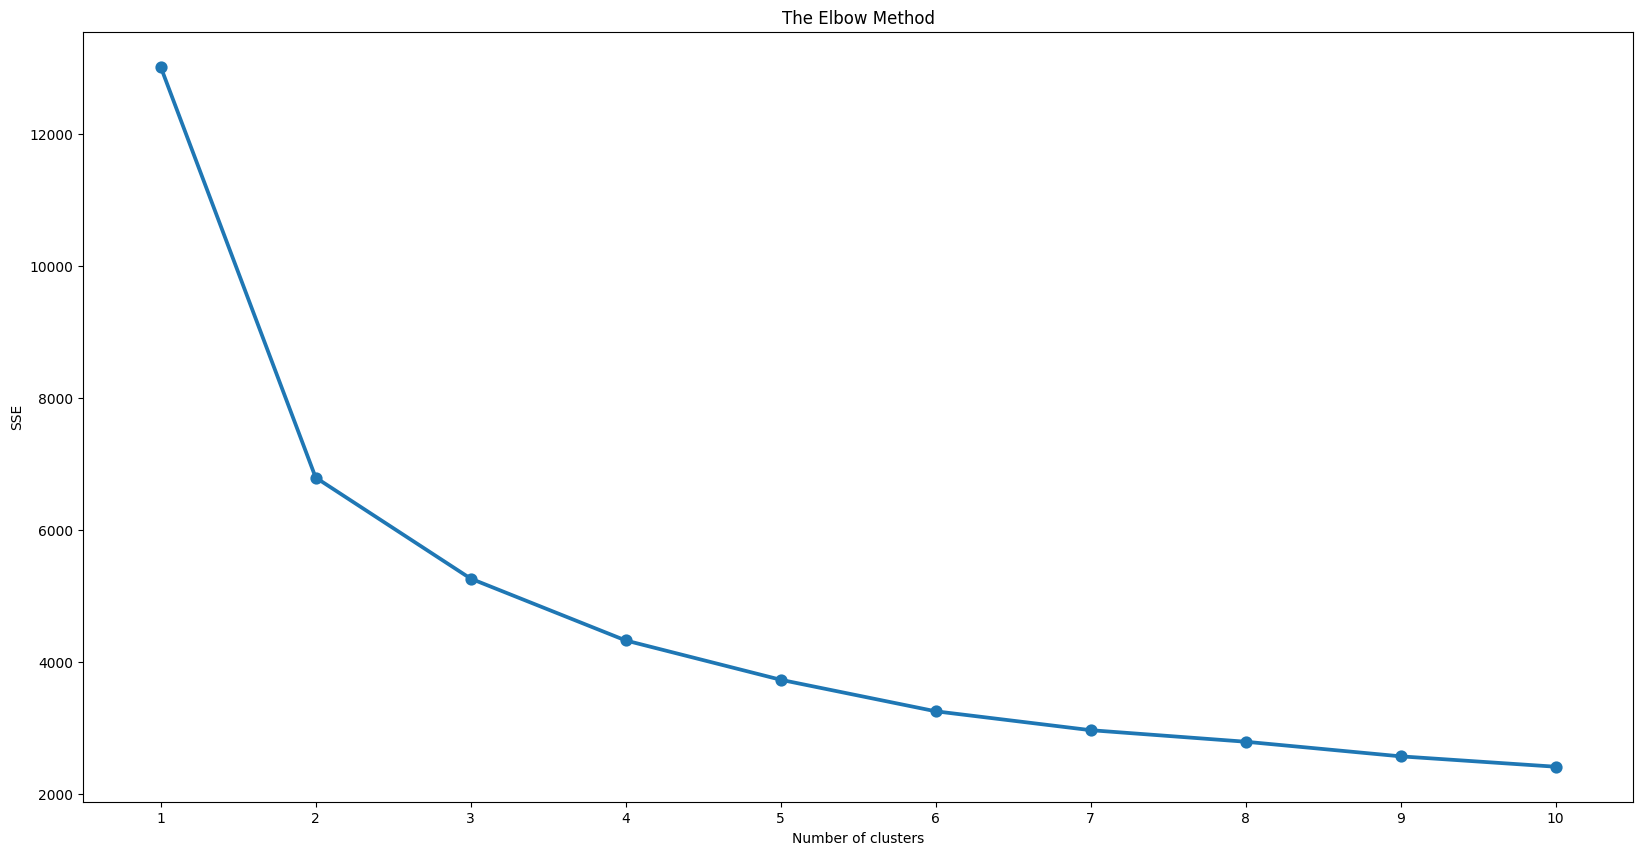

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,11):
  kmean = KMeans(n_clusters=k , random_state=42)
  kmean.fit(df_scaled)
  sse[k] = kmean.inertia_

plt.figure(figsize = (20,10))
sns.pointplot(x = sse.keys() , y = sse.values())
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Chọn k =3 hoặc k = 4

In [ ]:
model = KMeans(n_clusters=3 , random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_final['Cluster'] = model.labels_

In [ ]:
df_final.head(2)

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.6,0
12347.0,2,182,4310.0,1


In [ ]:
df_final.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'Cluster': 'count'
    }
)

,Recency,Frequency,Monetary,Cluster
Cluster,,,,
0,65.784411,50.792150,963.783949,1809
1,20.125845,236.842905,5711.920684,1184
2,192.260223,15.157621,283.129845,1345


In [54]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
